In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import sklearn.metrics as skm
import sklearn.preprocessing as skp
import sklearn.svm as svm
import seaborn as sns
csv = pd.read_csv('hr-analytics.csv') #requirement 1 reading the csv data

In [2]:
csv_dummies = pd.get_dummies(csv)# requirement2 : one hot coding for non number type

In [3]:
nul_dataframe = pd.isna(csv_dummies) # requirement3 : filling Nan with column average
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):       # find Nan
        csv_dummies[str(series_null)].fillna(value=csv_dummies[str(series_null)].mean(),inplace=True) # fillna with average

In [4]:
left = csv_dummies['left'] # extract left
csv_dummies_heat = csv_dummies
csv_dummies = csv_dummies.drop(columns=['left']) #drop left

In [5]:
y_train , y_test = left[:round(len(left)*0.7)] , left[round(len(left)*0.7):]
x_train , x_test = csv_dummies[:round(len(left)*0.7)] , csv_dummies[round(len(left)*0.7):]
y_test = np.array(y_test) #splitting data set with ratio of 7:3 , for the first part of requirement4

In [6]:
logistic_learn = skl.LogisticRegression().fit(x_train,y_train)
SVM_learn = svm.LinearSVC().fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
logistic_y_predict = logistic_learn.predict(x_test)
SVM_y_predict = SVM_learn.predict(x_test)

logistic_score = skm.accuracy_score(y_test,logistic_y_predict)
SVM_score = skm.accuracy_score(y_test,SVM_y_predict)

print("logistic score",logistic_score)
print("SVM score",SVM_score) #requirement 5
            

logistic score 0.5964444444444444
SVM score 0.6926666666666667


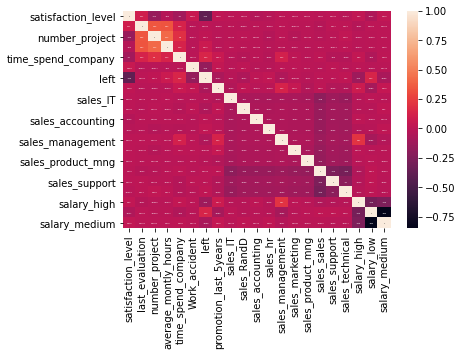

In [8]:
corr_matrix = csv_dummies_heat.corr() # for requirement 6 i extract the correlation matrix , to see whether it is correlated
sns.heatmap(corr_matrix,annot = True, annot_kws={"size": 2})
left_corr = corr_matrix['left']
left_corr = left_corr.to_list()


## when showing the correlation matrix , we found out that most of the data isn't correlate with the left.

so I am thinking to train on the most correlated column

after that, i also perform Standardization to all the data

In [9]:
left_corr_with_name = []
for num,name in zip(left_corr,corr_matrix.columns): # so bind the column name and the correlation together
    left_corr_with_name.append((name,num))

In [10]:
def sort_abs_name(tuple_file):
    return abs(tuple_file[1]) # define the sort function with abs value of the previous bind array

left_corr_with_name.sort(key=sort_abs_name) # after the sort the list will follow from least correlated to most correlated
left_corr_with_name = left_corr_with_name[:-1]# to remove sale_price which corr is 1

In [11]:
most_corr_four = pd.DataFrame() # init a new dataframe for undertake training
for tuple_file in left_corr_with_name[-3:]: # pick the last four for most correlated
    most_corr_four[tuple_file[0]] = csv_dummies[tuple_file[0]].values # add to the dataframe

In [12]:
most_corr_four = skp.scale(most_corr_four)
y_train , y_test = left[:round(len(left)*0.7)] , left[round(len(left)*0.7):]
x_train , x_test = most_corr_four[:round(len(left)*0.7)] , most_corr_four[round(len(left)*0.7):]
y_test = np.array(y_test) #splitting data set with ratio of 7:3

In [13]:
logistic_learn = skl.LogisticRegression().fit(x_train,y_train)
SVM_learn = svm.LinearSVC().fit(x_train,y_train)


In [14]:
logistic_y_predict = logistic_learn.predict(x_test)
SVM_y_predict = SVM_learn.predict(x_test)

logistic_score = skm.accuracy_score(y_test,logistic_y_predict)
SVM_score = skm.accuracy_score(y_test,SVM_y_predict)

print(logistic_score)  # it becomes better
print(SVM_score) # but not for svm


0.6142222222222222
0.622


0.622


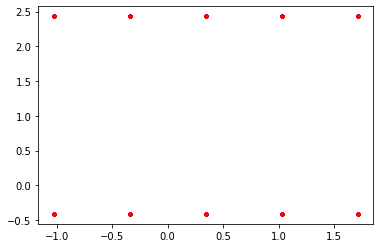

In [15]:
SVM_New_learn = svm.SVC(kernel='poly').fit(x_train,y_train) # also I am trying on another kernel to see whether it is better 
SVM_New_y_predict = SVM_learn.predict(x_test)
SVM_New_score = skm.accuracy_score(y_test,SVM_y_predict)
print(SVM_New_score)#but the result wasn't change
svec = SVM_New_learn.support_vectors_
x = [i[0] for i in svec]
y = [i[1] for i in svec]
plt.plot(x,y,'.r')
